In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib
import shap
from PIL import Image
import PIL

%matplotlib inline

In [3]:
!pip install dabl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 10.5 MB/s eta 0:00:00


In [4]:
import dabl

In [5]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [6]:
df = pd.read_excel('/content/drive/My Drive/updated_dataset_severity.xlsx')
df.head()

,acci_id,acci_date,acci_time,acci_ar,acci_en,acci_x,acci_y,acci_hour,temp_c,humidity,wind_kph,precip_mm,cloud,pressure_mb,condition,day_of_week,season,description,severity,part_of_day
0,6375204338,2025-03-20,07:03:55,اصطدام بين مركبتين - بليغ,Collision between two vehicles - severe,25.188846,55.293679,7,21.3,46.0,9.4,0.0,0.0,1016.0,Sunny,Thursday,Spring,Collision between two vehicles,severe,Morning
1,6375212252,2025-03-20,07:06:40,اصطدام بين مركبتين - بليغ,Collision between two vehicles - severe,24.994890,55.187760,7,21.3,46.0,9.4,0.0,0.0,1016.0,Sunny,Thursday,Spring,Collision between two vehicles,severe,Morning
2,6375213996,2025-03-20,07:07:21,اصطدام بين شاحنة ومركبة - بسيط,Collision between a truck and a vehicle - simple,25.183209,55.348691,7,21.3,46.0,9.4,0.0,0.0,1016.0,Sunny,Thursday,Spring,Collision between a truck and a vehicle,simple,Morning
3,6375215128,2025-03-20,07:07:44,صدم دراجة نارية - بليغ,Collision with a motorcycle - severe,25.111427,55.207698,7,21.3,46.0,9.4,0.0,0.0,1016.0,Sunny,Thursday,Spring,Collision with a motorcycle,severe,Morning
4,6375254968,2025-03-20,07:22:10,تعطل مركبة خفيفة - بسيط,Light vehicle breakdown - minor,24.949922,55.137950,7,21.3,46.0,9.4,0.0,0.0,1016.0,Sunny,Thursday,Spring,Light vehicle breakdown,minor,Morning


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74312 entries, 0 to 74311
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   acci_id      74312 non-null  int64         
 1   acci_date    74312 non-null  datetime64[ns]
 2   acci_time    74312 non-null  object        
 3   acci_ar      74312 non-null  object        
 4   acci_en      74312 non-null  object        
 5   acci_x       74312 non-null  float64       
 6   acci_y       74312 non-null  float64       
 7   acci_hour    74312 non-null  int64         
 8   temp_c       74184 non-null  float64       
 9   humidity     74184 non-null  float64       
 10  wind_kph     74184 non-null  float64       
 11  precip_mm    74184 non-null  float64       
 12  cloud        74184 non-null  float64       
 13  pressure_mb  74184 non-null  float64       
 14  condition    74184 non-null  object        
 15  day_of_week  74312 non-null  object        
 16  seas

In [8]:
df.isnull().sum()

,0
acci_id,0
acci_date,0
acci_time,0
acci_ar,0
acci_en,0
acci_x,0
acci_y,0
acci_hour,0
temp_c,128
humidity,128


In [9]:
#from autoviz.AutoViz_Class import AutoViz_Class

#AV = AutoViz_Class()

severity
simple         58014
severe          6220
minor           5103
unspecified     4975
Name: count, dtype: int64


<Axes: xlabel='severity'>

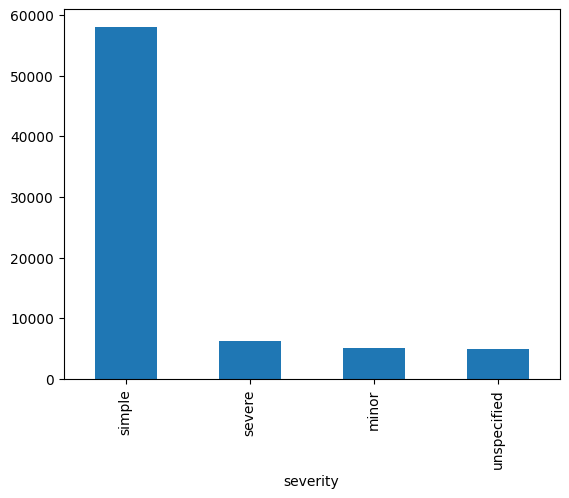

In [10]:
print(df['severity'].value_counts())
df['severity'].value_counts().plot(kind='bar')

<Axes: xlabel='condition'>

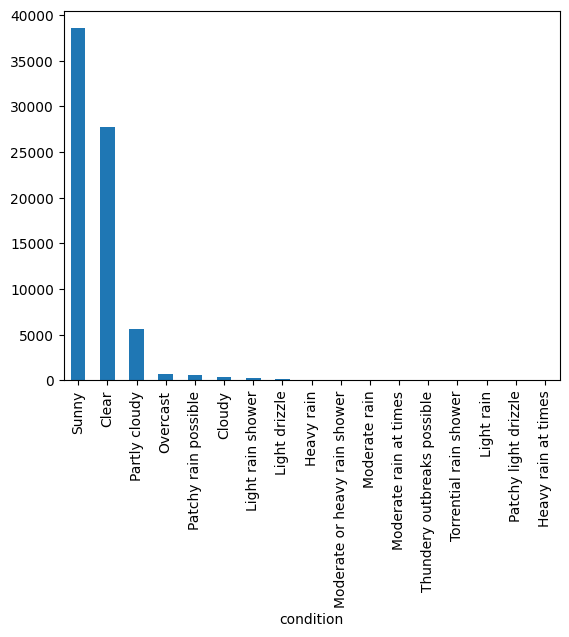

In [11]:
df['condition'].value_counts().plot(kind='bar')

<Figure size 600x500 with 0 Axes>

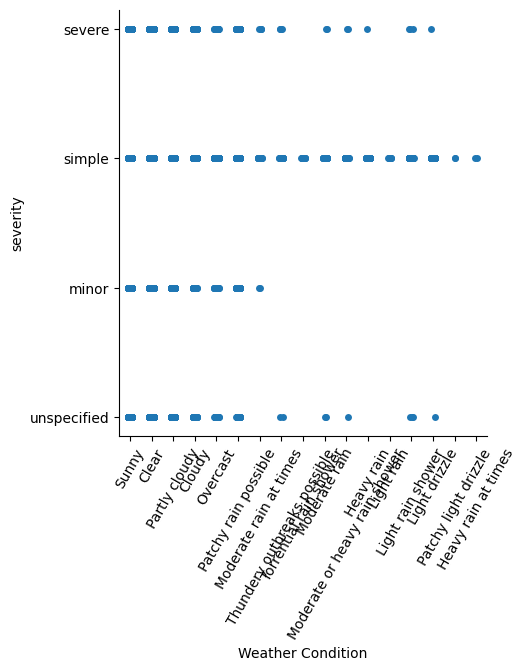

In [12]:
plt.figure(figsize=(6,5))
sns.catplot(x='condition', y='severity', data=df)
plt.xlabel("Weather Condition")
plt.xticks(rotation=60)
plt.show()

/usr/local/lib/python3.11/dist-packages/dabl/preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.11/dist-packages/dabl/preprocessing.py:182: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series)
/usr/local/lib/python3.11/dist-packages/dabl/preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.11/dist-packages/dabl/preprocessing.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back 

Target looks like classification


/usr/local/lib/python3.11/dist-packages/dabl/plot/utils.py:712: UserWarning: Dropped 6 outliers in column acci_x.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.11/dist-packages/dabl/plot/utils.py:712: UserWarning: Dropped 252 outliers in column acci_y.
  warn("Dropped {} outliers in column {}.".format(
/usr/local/lib/python3.11/dist-packages/dabl/plot/utils.py:615: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, group in data.groupby(target)[column]:
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


Linear Discriminant Analysis training set score: 0.250


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='severity'>,
 [<Figure size 1200x1200 with 9 Axes>,
  array([[<Axes: title={'center': '0.255'}, xlabel='acci_id', ylabel='acci_x'>,
          <Axes: title={'center': '0.254'}, xlabel='acci_id', ylabel='wind_kph'>,
          <Axes: title={'center': '0.254'}, xlabel='acci_id', ylabel='humidity'>,
          <Axes: title={'center': '0.254'}, xlabel='temp_c', ylabel='cloud'>]],
        dtype=object),
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 1200x400 with 3 Axes>],
 array([[<Axes: title={'center': 'acci_en'}>,
         <Axes: title={'center': 'acci_ar'}>,
         <Axes: title={'center': 'description'}>,
         <Axes: title={'center': 'season'}>],
        [<Axes: title={'center': 'condition'}>,
         <Axes: title={'center': 'part_of_day'}>,
         <Axes: title={'center': 'day_of_week'}>, <Axes: >]], dtype=object)]

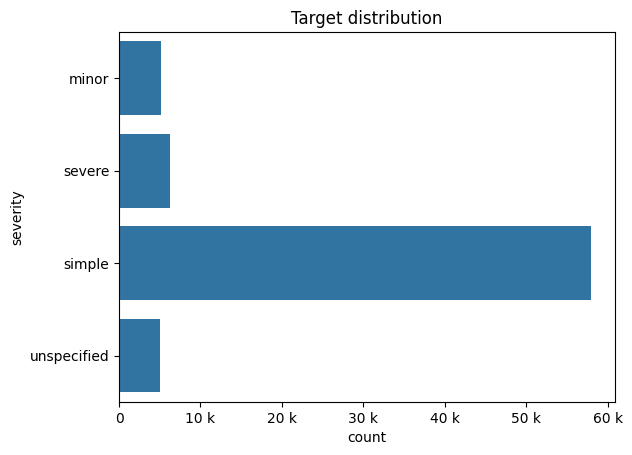

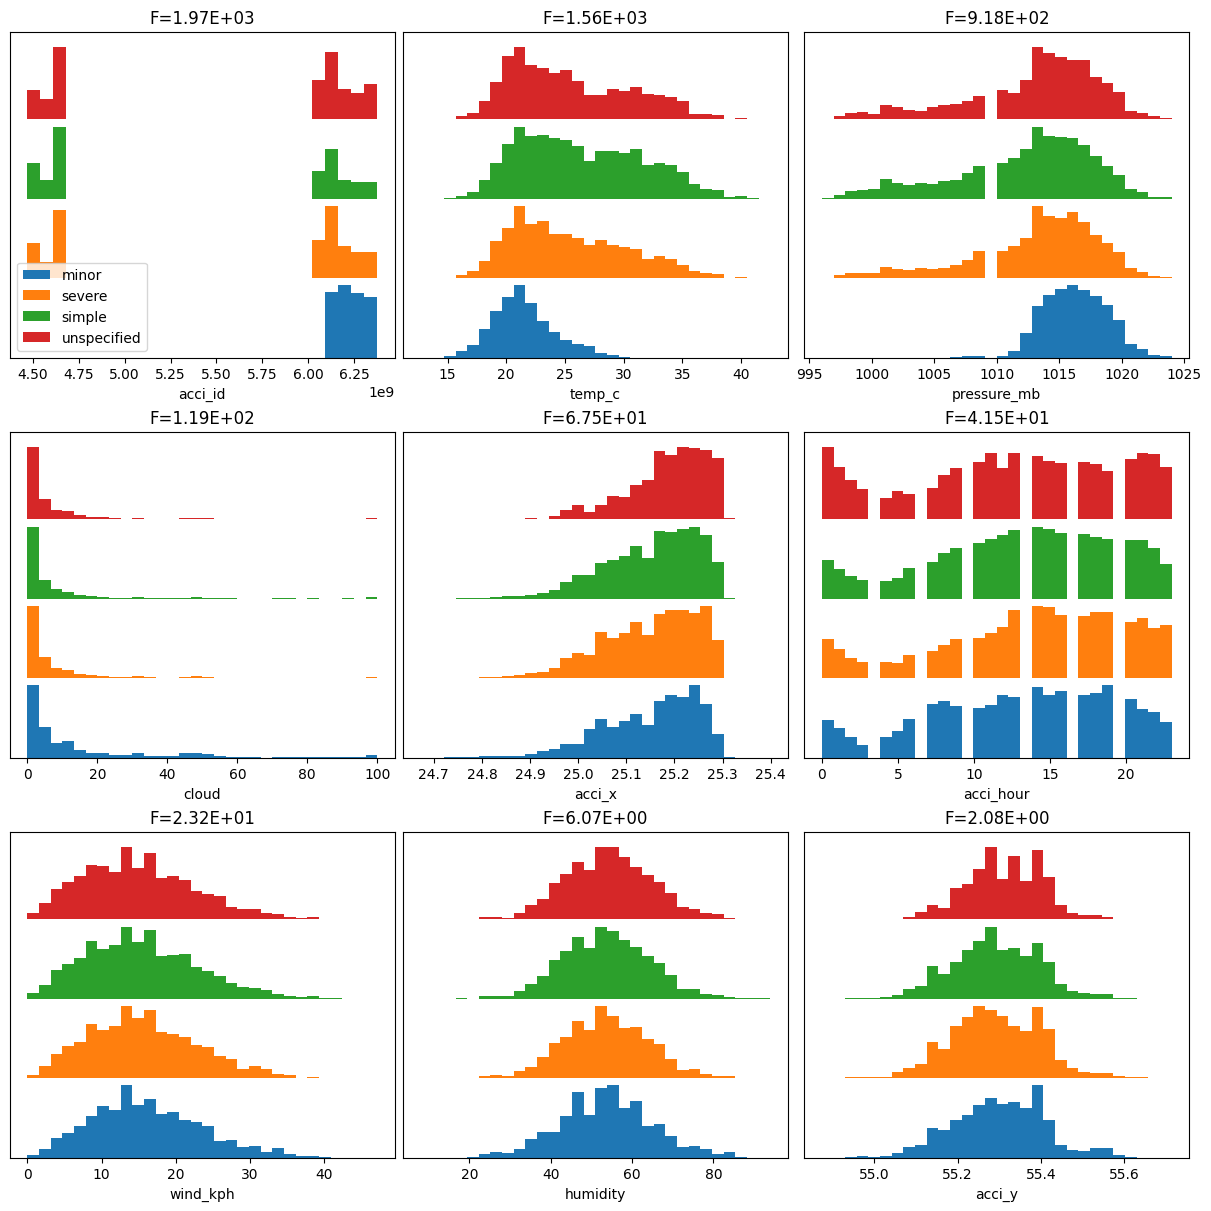

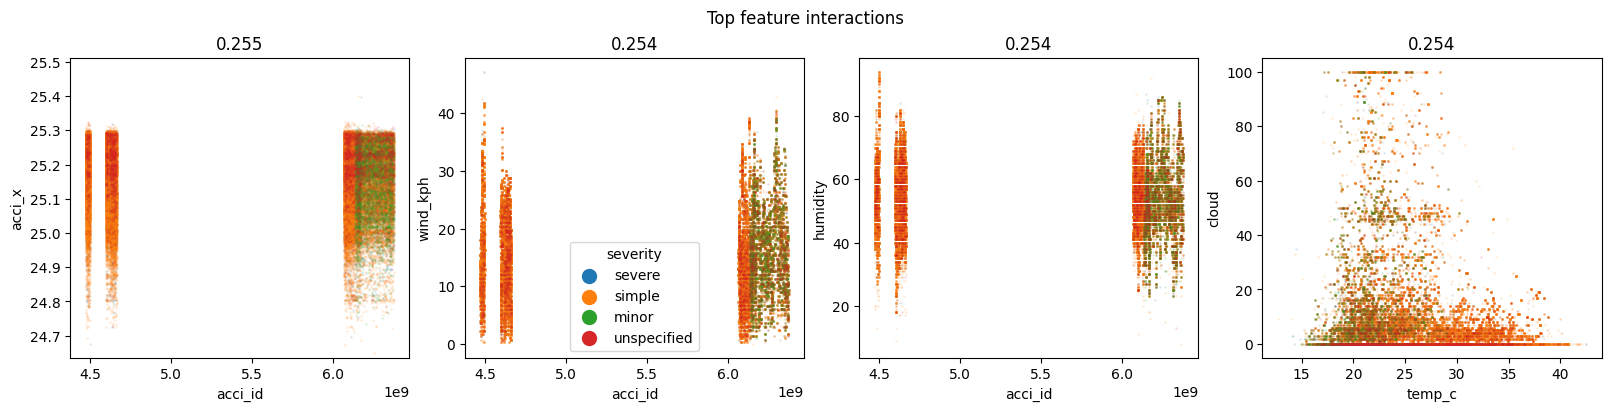

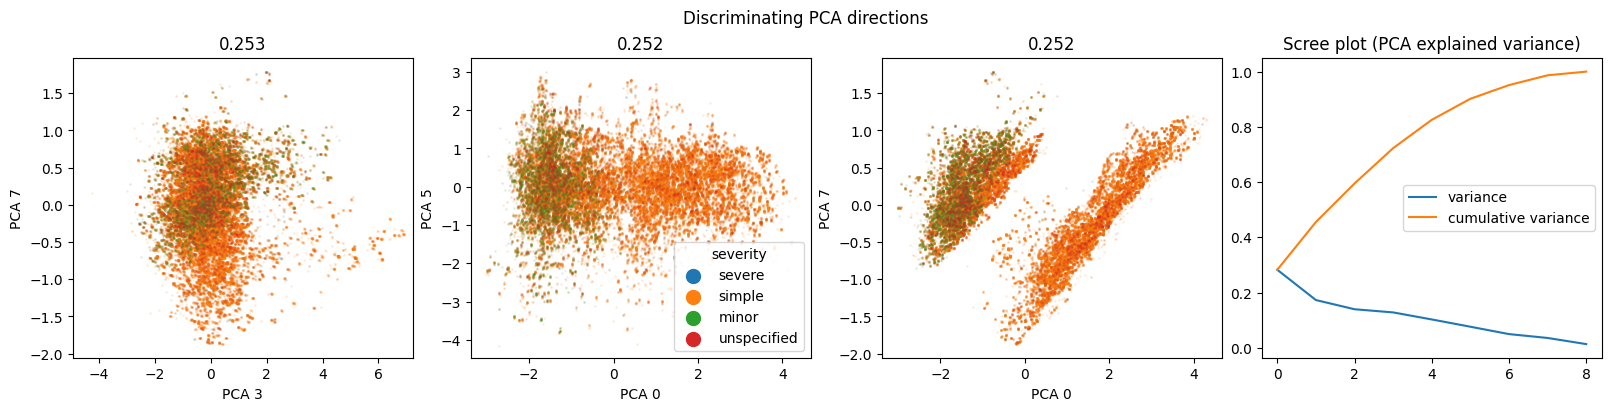

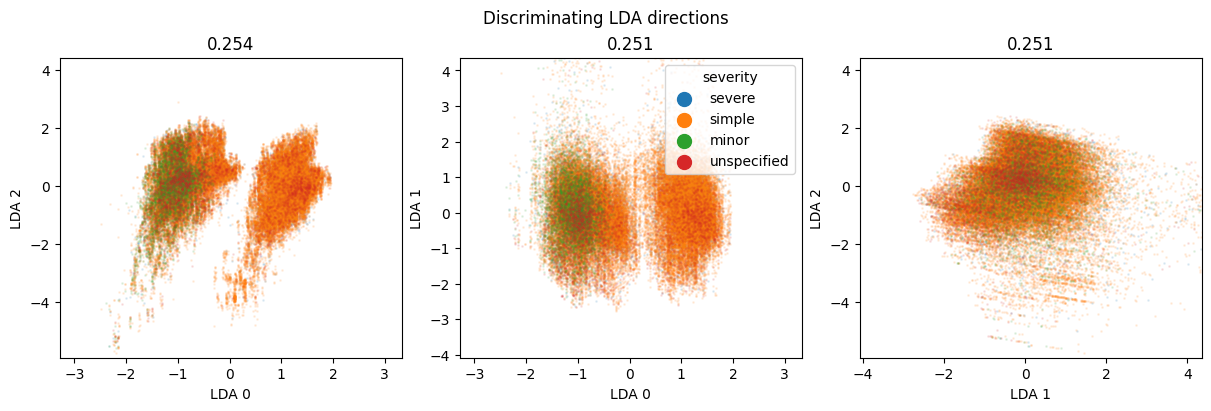

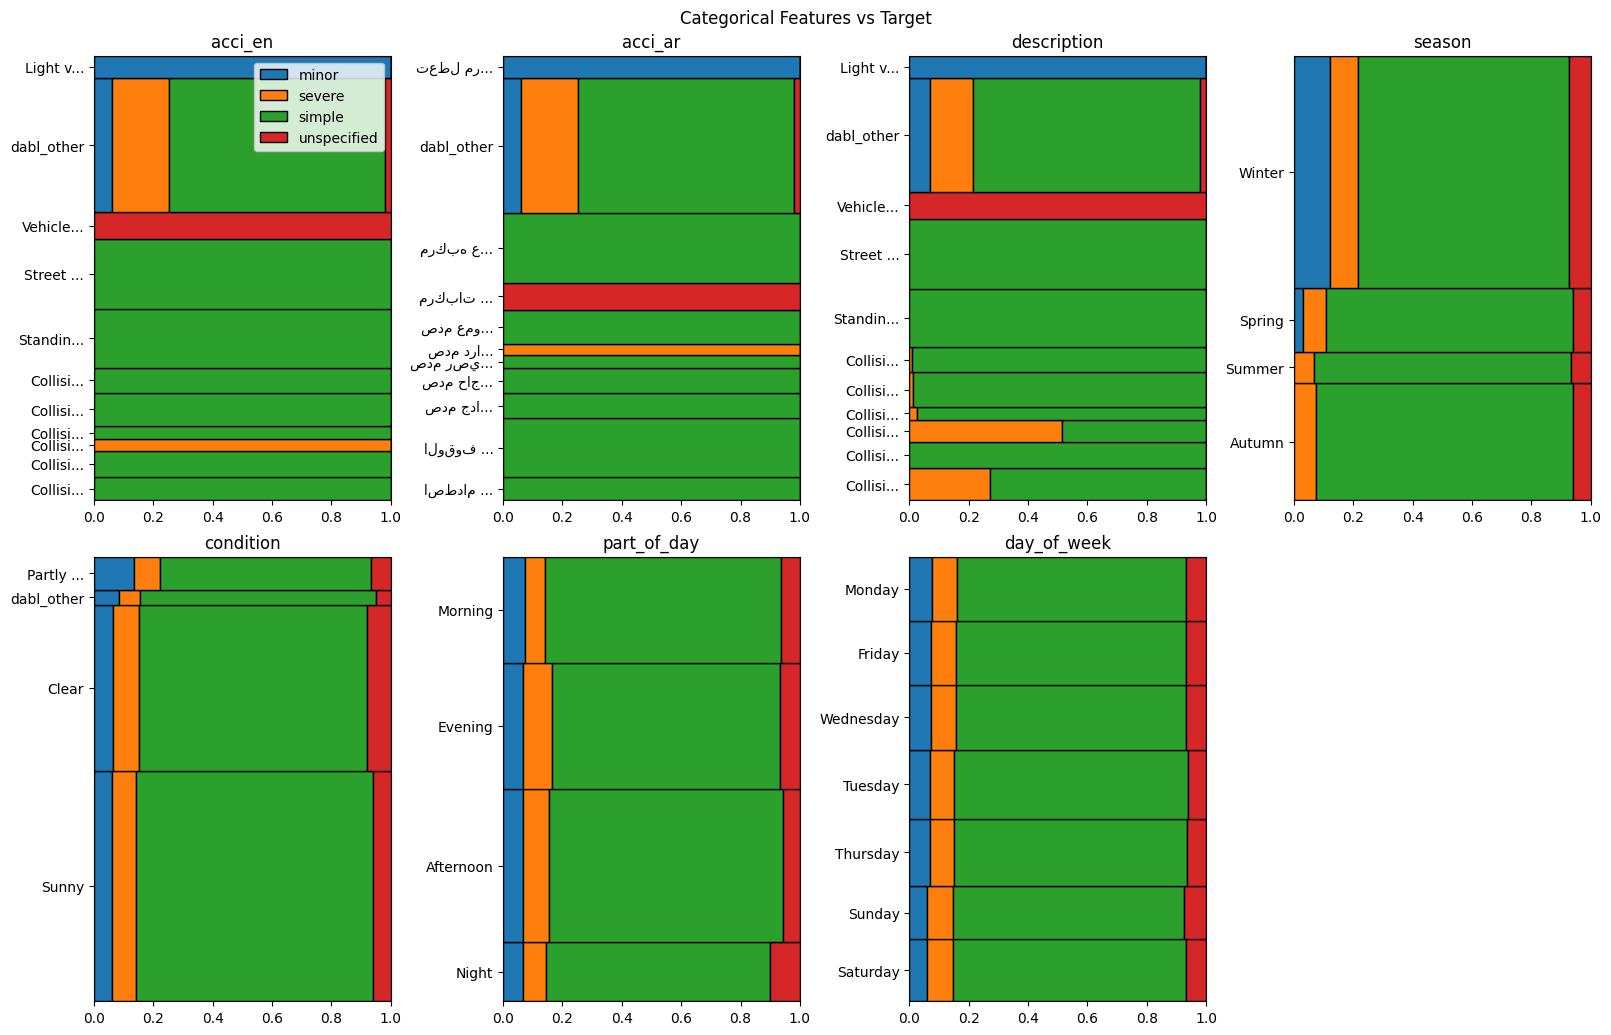

In [13]:
dabl.plot(df, target_col='severity')

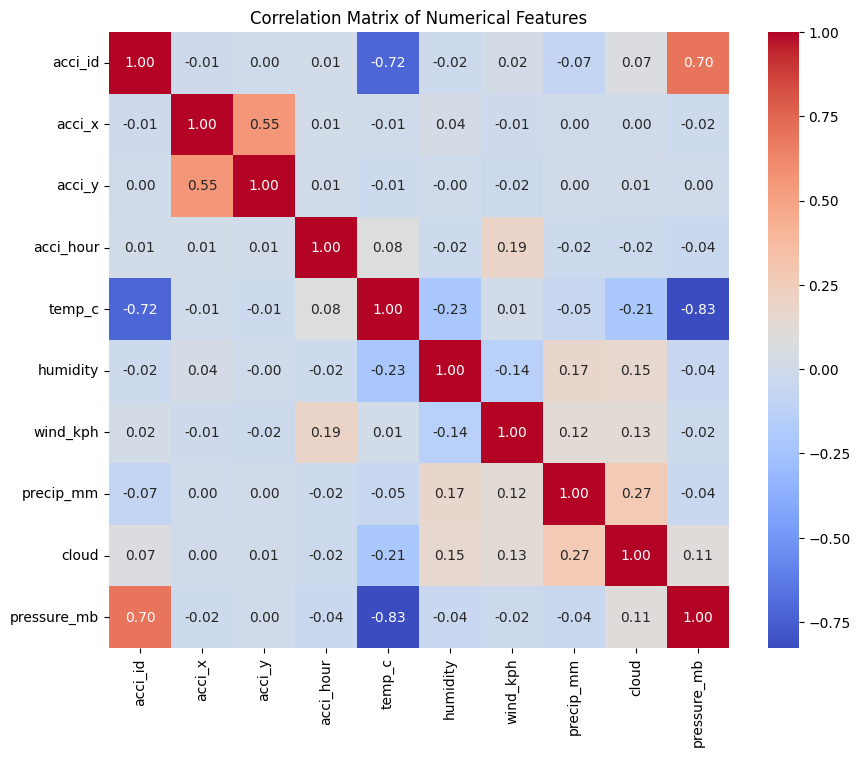

In [14]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

condition
Sunny                            38541
Clear                            27703
Partly cloudy                     5598
Overcast                           697
Patchy rain possible               616
Cloudy                             411
Light rain shower                  204
Light drizzle                      129
Heavy rain                          60
Moderate or heavy rain shower       56
Moderate rain                       52
Moderate rain at times              44
Thundery outbreaks possible         42
Torrential rain shower              16
Light rain                          11
Patchy light drizzle                 2
Heavy rain at times                  2
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

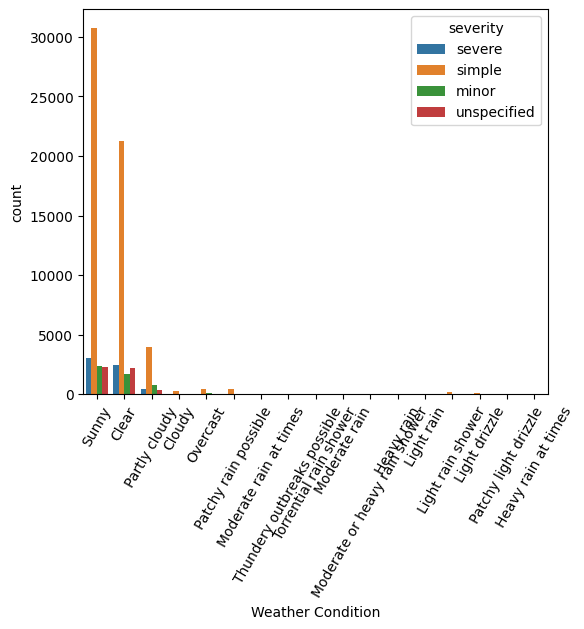

In [15]:
print(df['condition'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='condition', hue='severity', data=df)
plt.xlabel('Weather Condition')
plt.xticks(rotation=60)
plt.show

In [16]:
pivot_df = pd.pivot_table(data=df,
               index='condition',         # or: day_of_week, season, part_of_day
               columns='severity',        # your target variable
               values='acci_id',          # any unique ID column for counting
               aggfunc='count')           # count # of accidents in each group

pivot_df.fillna(0, inplace=True)
pivot_df['total_accidents'] = pivot_df.sum(axis=1)
pivot_df

severity,minor,severe,simple,unspecified,total_accidents
condition,,,,,
Clear,1730.0,2488.0,21296.0,2189.0,27703.0
Cloudy,35.0,41.0,309.0,26.0,411.0
Heavy rain,0.0,1.0,59.0,0.0,60.0
Heavy rain at times,0.0,0.0,2.0,0.0,2.0
Light drizzle,0.0,1.0,127.0,1.0,129.0
Light rain,0.0,0.0,11.0,0.0,11.0
Light rain shower,0.0,3.0,198.0,3.0,204.0
Moderate or heavy rain shower,0.0,2.0,53.0,1.0,56.0
Moderate rain,0.0,2.0,48.0,2.0,52.0


In [17]:
condition_percent_df = pivot_df.apply(
    lambda row: (row / row['total_accidents']) * 100, axis=1
)

condition_percent_df

severity,minor,severe,simple,unspecified,total_accidents
condition,,,,,
Clear,6.244811,8.980977,76.872541,7.901671,100.0
Cloudy,8.515815,9.975669,75.182482,6.326034,100.0
Heavy rain,0.000000,1.666667,98.333333,0.000000,100.0
Heavy rain at times,0.000000,0.000000,100.000000,0.000000,100.0
Light drizzle,0.000000,0.775194,98.449612,0.775194,100.0
Light rain,0.000000,0.000000,100.000000,0.000000,100.0
Light rain shower,0.000000,1.470588,97.058824,1.470588,100.0
Moderate or heavy rain shower,0.000000,3.571429,94.642857,1.785714,100.0
Moderate rain,0.000000,3.846154,92.307692,3.846154,100.0


In [18]:
df.groupby('condition')['severity'].count()

,severity
condition,
Clear,27703
Cloudy,411
Heavy rain,60
Heavy rain at times,2
Light drizzle,129
Light rain,11
Light rain shower,204
Moderate or heavy rain shower,56
Moderate rain,52


part_of_day
Afternoon    25609
Evening      21133
Morning      17725
Night         9845
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

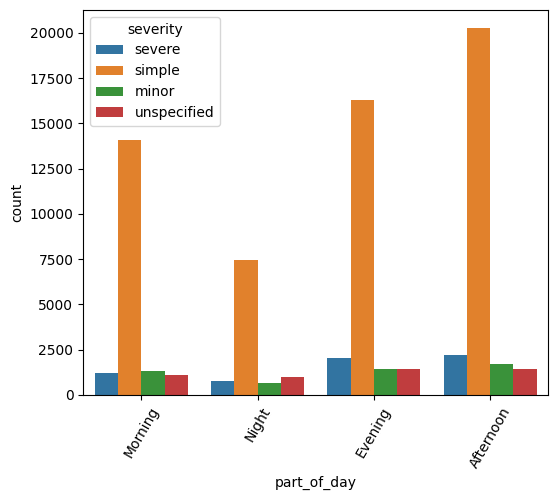

In [19]:
print(df['part_of_day'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='part_of_day', hue='severity', data=df)
plt.xlabel('part_of_day')
plt.xticks(rotation=60)
plt.show

In [20]:
pivot_df = pd.pivot_table(data=df,
               index='part_of_day',         # or: day_of_week, season, part_of_day
               columns='severity',        # your target variable
               values='acci_id',          # any unique ID column for counting
               aggfunc='count')           # count # of accidents in each group

pivot_df.fillna(0, inplace=True)
pivot_df['total_accidents'] = pivot_df.sum(axis=1)
pivot_df

severity,minor,severe,simple,unspecified,total_accidents
part_of_day,,,,,
Afternoon,1693,2228,20246,1442,25609
Evening,1433,2021,16262,1417,21133
Morning,1330,1190,14082,1123,17725
Night,647,781,7424,993,9845


In [21]:
part_of_day_df = pivot_df.apply(
    lambda row: (row / row['total_accidents']) * 100, axis=1
)

part_of_day_df

severity,minor,severe,simple,unspecified,total_accidents
part_of_day,,,,,
Afternoon,6.610957,8.700066,79.058144,5.630833,100.0
Evening,6.780864,9.563242,76.950741,6.705153,100.0
Morning,7.503526,6.713681,79.447109,6.335684,100.0
Night,6.571864,7.932961,75.408837,10.086338,100.0


In [22]:
df.groupby('part_of_day')['severity'].count()

,severity
part_of_day,
Afternoon,25609
Evening,21133
Morning,17725
Night,9845


season
Winter    38862
Autumn    19628
Spring    10599
Summer     5223
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

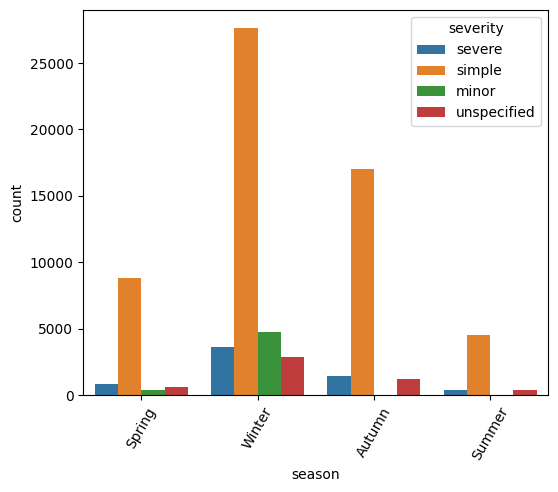

In [23]:
print(df['season'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='season', hue='severity', data=df)
plt.xlabel('season')
plt.xticks(rotation=60)
plt.show

In [24]:
pivot_df = pd.pivot_table(data=df,
               index='season',         # or: day_of_week, season, part_of_day
               columns='severity',        # your target variable
               values='acci_id',          # any unique ID column for counting
               aggfunc='count')           # count # of accidents in each group

pivot_df.fillna(0, inplace=True)
pivot_df['total_accidents'] = pivot_df.sum(axis=1)
pivot_df

severity,minor,severe,simple,unspecified,total_accidents
season,,,,,
Autumn,0.0,1447.0,17016.0,1165.0,19628.0
Spring,329.0,821.0,8829.0,620.0,10599.0
Summer,0.0,351.0,4533.0,339.0,5223.0
Winter,4774.0,3601.0,27636.0,2851.0,38862.0


In [25]:
season_df = pivot_df.apply(
    lambda row: (row / row['total_accidents']) * 100, axis=1
)

season_df

severity,minor,severe,simple,unspecified,total_accidents
season,,,,,
Autumn,0.000000,7.372121,86.692480,5.935398,100.0
Spring,3.104066,7.746014,83.300311,5.849608,100.0
Summer,0.000000,6.720276,86.789202,6.490523,100.0
Winter,12.284494,9.266121,71.113170,7.336215,100.0


In [26]:
df.groupby('season')['severity'].count()

,severity
season,
Autumn,19628
Spring,10599
Summer,5223
Winter,38862


day_of_week
Tuesday      11464
Thursday     11250
Wednesday    10850
Monday       10742
Friday       10723
Saturday     10371
Sunday        8912
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

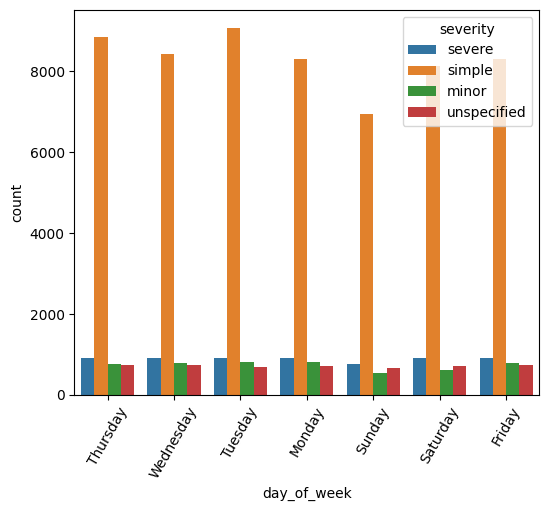

In [27]:
print(df['day_of_week'].value_counts())

plt.figure(figsize=(6,5))
sns.countplot(x='day_of_week', hue='severity', data=df)
plt.xlabel('day_of_week')
plt.xticks(rotation=60)
plt.show

In [28]:
pivot_df = pd.pivot_table(data=df,
               index='day_of_week',         # or: day_of_week, season, part_of_day
               columns='severity',        # your target variable
               values='acci_id',          # any unique ID column for counting
               aggfunc='count')           # count # of accidents in each group

pivot_df.fillna(0, inplace=True)
pivot_df['total_accidents'] = pivot_df.sum(axis=1)
pivot_df

severity,minor,severe,simple,unspecified,total_accidents
day_of_week,,,,,
Friday,779,901,8305,738,10723
Monday,813,915,8299,715,10742
Saturday,614,921,8118,718,10371
Sunday,533,768,6951,660,8912
Thursday,771,910,8840,729,11250
Tuesday,812,900,9064,688,11464
Wednesday,781,905,8437,727,10850


In [29]:
day_of_week_df = pivot_df.apply(
    lambda row: (row / row['total_accidents']) * 100, axis=1
)

day_of_week_df

severity,minor,severe,simple,unspecified,total_accidents
day_of_week,,,,,
Friday,7.264758,8.402499,77.450340,6.882402,100.0
Monday,7.568423,8.517967,77.257494,6.656116,100.0
Saturday,5.920355,8.880532,78.275962,6.923151,100.0
Sunday,5.980700,8.617594,77.995961,7.405745,100.0
Thursday,6.853333,8.088889,78.577778,6.480000,100.0
Tuesday,7.083043,7.850663,79.064899,6.001396,100.0
Wednesday,7.198157,8.341014,77.760369,6.700461,100.0


In [30]:
df.groupby('day_of_week')['severity'].count()

,severity
day_of_week,
Friday,10723
Monday,10742
Saturday,10371
Sunday,8912
Thursday,11250
Tuesday,11464
Wednesday,10850


In [31]:
df['acci_time'] = pd.to_datetime(df['acci_time'], format='%H:%M:%S')

In [32]:
obj_cols = [col for col in df.columns if df[col].dtypes == 'object']
obj_cols2 = [col for col in obj_cols if col != 'severity']
obj_cols2

['acci_ar',
 'acci_en',
 'condition',
 'day_of_week',
 'season',
 'description',
 'part_of_day']

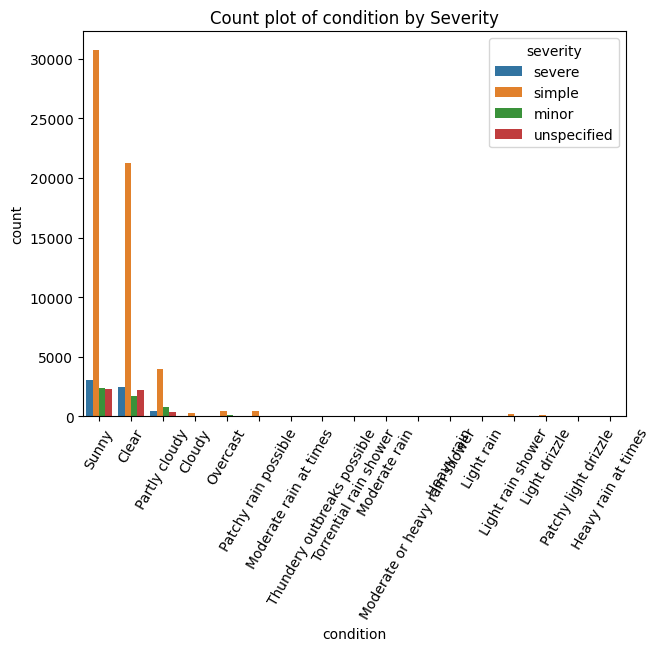

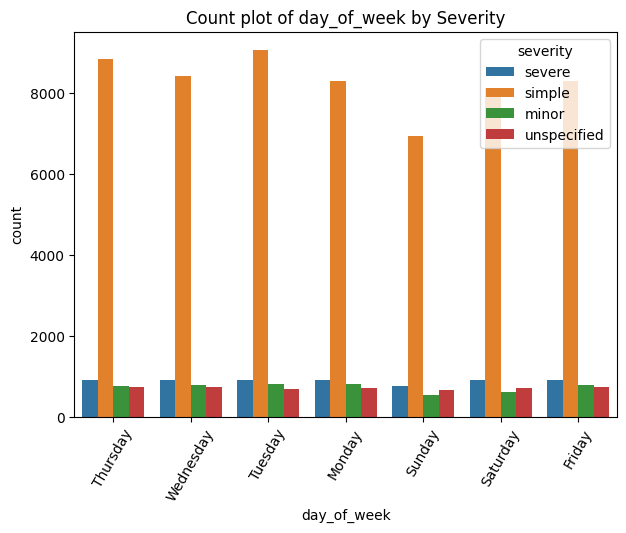

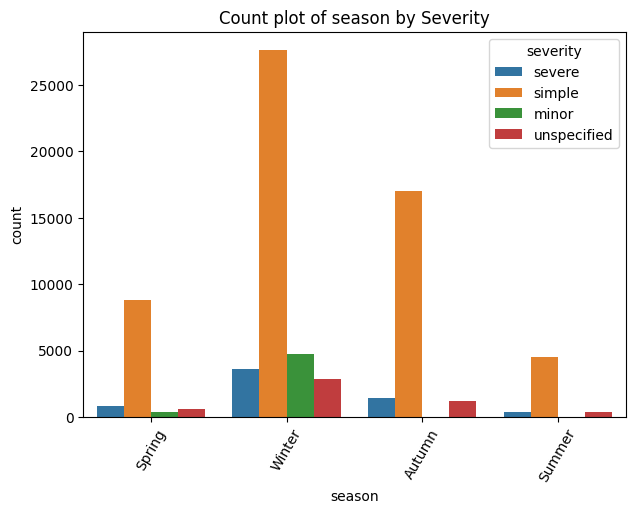

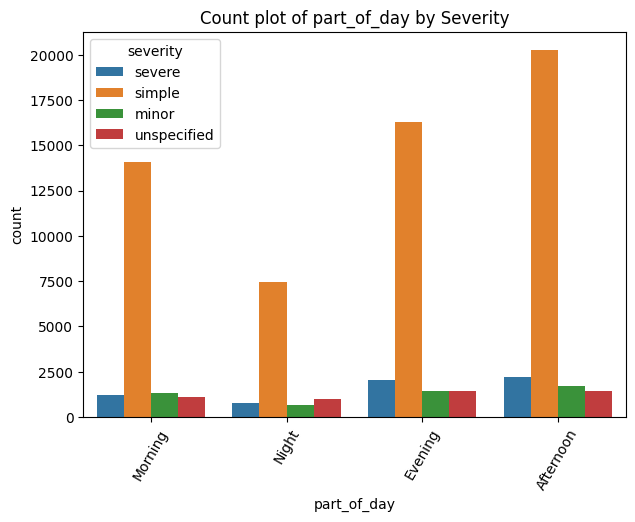

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns you want to visualize
selected_cols = ['condition', 'day_of_week', 'season', 'part_of_day']

def count_plot(col):
    plt.figure(figsize=(7,5))
    sns.countplot(x=col, hue='severity', data=df)
    plt.xlabel(col)
    plt.xticks(rotation=60)
    plt.title(f'Count plot of {col} by Severity')
    plt.show()  # Important: parentheses to display plot

for col in selected_cols:
    count_plot(col)

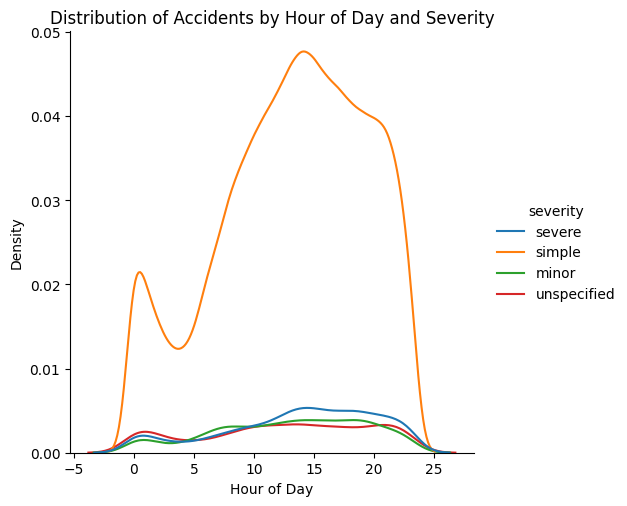

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=df, x='acci_hour', hue='severity', kind='kde', height=5, aspect=1)
plt.xlabel('Hour of Day')
plt.title('Distribution of Accidents by Hour of Day and Severity')
plt.show()

In [35]:
features = ['acci_x', 'acci_y', 'acci_hour', 'temp_c', 'humidity', 'wind_kph', 'precip_mm', 'cloud', 'pressure_mb', 'condition', 'day_of_week', 'season', 'part_of_day']
print(len(features))

13


In [36]:
X = df[features]
y = df['severity']

In [37]:
# meta data of the new sub dataset
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74312 entries, 0 to 74311
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acci_x       74312 non-null  float64
 1   acci_y       74312 non-null  float64
 2   acci_hour    74312 non-null  int64  
 3   temp_c       74184 non-null  float64
 4   humidity     74184 non-null  float64
 5   wind_kph     74184 non-null  float64
 6   precip_mm    74184 non-null  float64
 7   cloud        74184 non-null  float64
 8   pressure_mb  74184 non-null  float64
 9   condition    74184 non-null  object 
 10  day_of_week  74312 non-null  object 
 11  season       74312 non-null  object 
 12  part_of_day  74312 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 7.4+ MB


In [38]:
print("Original shape:", df.shape)

Original shape: (74312, 20)


In [39]:
df = df[df['severity'] != 'unspecified']

In [40]:
print("Dataset shape after unspecified class dropped:", df.shape)

Dataset shape after unspecified class dropped: (69337, 20)


In [41]:
columns_with_nulls = ["temp_c", "humidity", "wind_kph", "precip_mm", "cloud", "pressure_mb", "condition"]
df = df.dropna(subset=columns_with_nulls)

In [42]:
print("New shape after removing 'unspecified' and nulls:", df.shape)

New shape after removing 'unspecified' and nulls: (69216, 20)


In [43]:
num_features = ['acci_x', 'acci_y', 'acci_hour', 'temp_c', 'humidity', 'wind_kph',
                'precip_mm', 'cloud', 'pressure_mb']

In [44]:
cat_features = ['condition', 'day_of_week', 'season', 'part_of_day']

In [45]:
# Separate feature set
X = df[features]
y = df['severity']

# One-hot encode only categorical features
X_encoded_cat = pd.get_dummies(X[cat_features], drop_first=True)

# Keep numerical features as is
X_numerical = X[num_features]

# Combine both
encoded_df = pd.concat([X_numerical, X_encoded_cat], axis=1)

print("Encoded feature shape:", encoded_df.shape)

Encoded feature shape: (69216, 37)


In [47]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
lb.fit(y)

y_encoded = lb.transform(y)
print("Encoded labels:", lb.classes_)  # e.g., ['minor', 'severe', 'simple']

# Optional: convert to Series if needed later
y_en = pd.Series(y_encoded)

Encoded labels: ['minor' 'severe' 'simple']


In [48]:
# Numerical features are first columns (0 to len(num_features)-1)
# Categorical features come after numerical features, so indices start at len(num_features)

cat_feature_indices = list(range(len(num_features), len(num_features) + len(cat_features)))
print("Categorical feature indices for SMOTENC:", cat_feature_indices)

Categorical feature indices for SMOTENC: [9, 10, 11, 12]


In [49]:
# Feature selection using k best chi2 method
## mutual info classif to check informative features
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [50]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

,Columns,MI_score
33,season_Winter,0.040763
3,temp_c,0.040678
8,pressure_mb,0.030920
22,condition_Sunny,0.009455
1,acci_y,0.009186
0,acci_x,0.007001
32,season_Summer,0.006204
7,cloud,0.006020
34,part_of_day_Evening,0.004545
5,wind_kph,0.004515


In [51]:
# feature seleciton method using chi2 for categorical output, categorical input
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new.shape
cols = fs.get_feature_names_out()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=50 is greater than n_features=37. All the features will be returned.
  warnings.warn(


In [52]:
fs_df = pd.DataFrame(X_new, columns=cols)

In [53]:
pca = PCA(n_components=3)
pca.fit(encoded_df)

X_pca = pca.transform(encoded_df)

# 3 components PCA algorithm
components = pca.components_

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df.var()

,0
PC1,332.739222
PC2,116.696141
PC3,57.597938


In [54]:
# Get list of categorical feature names from X_encoded
cat_feature_names = cat_features

# Find which selected columns belong to original categorical features
cat_indices_fs = [i for i, col in enumerate(cols) if any(cat in col for cat in cat_feature_names)]
print("Categorical feature indices after feature selection:", cat_indices_fs)

Categorical feature indices after feature selection: [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [55]:
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=cat_indices_fs, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(fs_df, y_en)

In [56]:
y_resampled.value_counts()

,count
1,57925
2,57925
0,57925


In [57]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# train-test split (you already have this)
X_trn, X_tst, y_trn, y_tst = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# LightGBM classifier setup (you can tune params later)
lgbm_clf = lgb.LGBMClassifier(
    n_estimators=800,
    max_depth=20,
    random_state=42,
    objective='multiclass',
    num_class=len(set(y_resampled)),  # number of classes in your target
)

# Train
lgbm_clf.fit(X_trn, y_trn)

# Predict
predics = lgbm_clf.predict(X_tst)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2337
[LightGBM] [Info] Number of data points in the train set: 139020, number of used features: 33
[LightGBM] [Info] Start training from score -1.097706
[LightGBM] [Info] Start training from score -1.100513
[LightGBM] [Info] Start training from score -1.097620


In [58]:
lgbm_clf.score(X_trn, y_trn)

0.8992159401524961

In [59]:
print(lb.classes_)

['minor' 'severe' 'simple']


In [60]:
classif_re = classification_report(y_tst,predics)
print(classif_re)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     11543
           1       0.92      0.77      0.84     11673
           2       0.83      0.86      0.85     11539

    accuracy                           0.85     34755
   macro avg       0.86      0.85      0.85     34755
weighted avg       0.86      0.85      0.85     34755



In [61]:
conf_matrix = confusion_matrix(y_tst, predics)
conf_matrix

array([[10798,   401,   344],
       [ 1043,  9021,  1609],
       [ 1270,   389,  9880]])

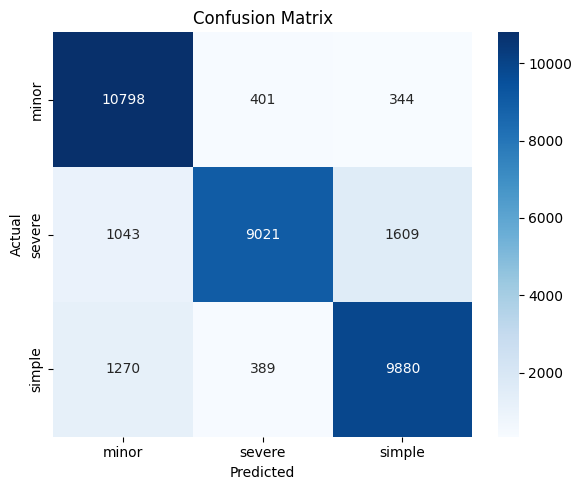

In [62]:
# Get confusion matrix
conf_matrix = confusion_matrix(y_tst, predics)

# Get class names from your LabelEncoder
class_names = lb.classes_  # ['minor', 'severe', 'simple'] or whatever your classes are

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [63]:
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)

0.8536845085526953


In [64]:
# prompt: ovefit underfit checker

# Function to check for overfitting/underfitting
def check_overfitting(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a trained model on training and test sets to identify overfitting or underfitting.

    Args:
        model: The trained machine learning model (e.g., scikit-learn estimator).
        X_train: Training features.
        y_train: Training labels.
        X_test: Test features.
        y_test: Test labels.
    """
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f"Training Score: {train_score:.4f}")
    print(f"Test Score: {test_score:.4f}")

    if train_score > test_score and (train_score - test_score) > 0.1: # Threshold for difference
        print("Potential Overfitting: Model performs significantly better on training data than on test data.")
    elif test_score < 0.6: # Example threshold for poor performance
         print("Potential Underfitting: Model performs poorly on both training and test data.")
    else:
        print("Model seems to generalize reasonably well.")

# Check the LightGBM model
check_overfitting(lgbm_clf, X_trn, y_trn, X_tst, y_tst)

Training Score: 0.8992
Test Score: 0.8545
Model seems to generalize reasonably well.


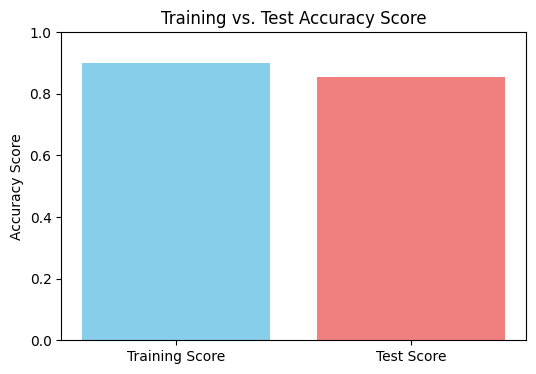

In [65]:
# prompt: i want an overfit underfit checker graph

# Let's create a simple graph to visualize the training and test scores

plt.figure(figsize=(6, 4))
plt.bar(['Training Score', 'Test Score'], [lgbm_clf.score(X_trn, y_trn), lgbm_clf.score(X_tst, y_tst)], color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy Score')
plt.title('Training vs. Test Accuracy Score')
plt.ylim(0, 1) # Assuming scores are between 0 and 1
plt.show()

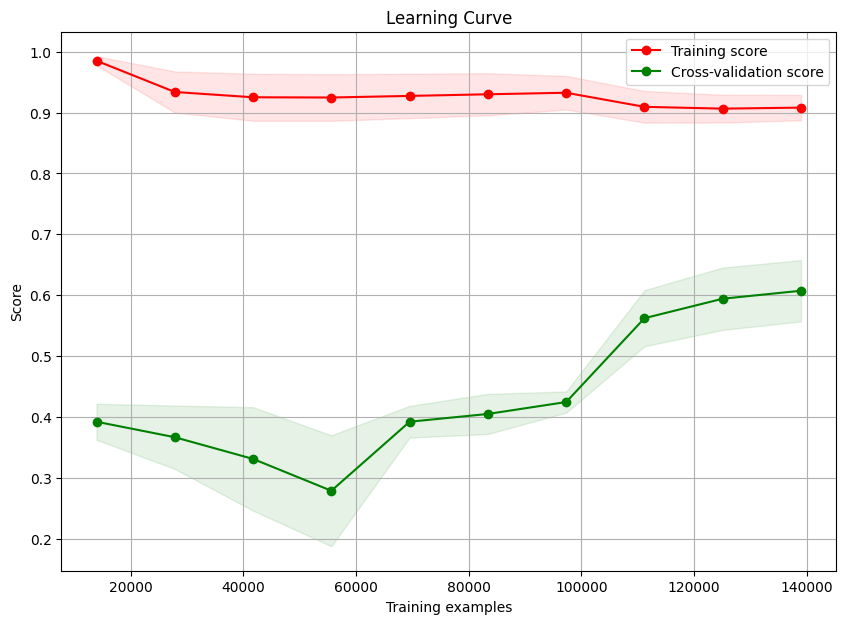

In [69]:
# prompt: i want to compare my training to cross validation in a learning curve

from sklearn.model_selection import learning_curve

# Define the range of training set sizes to evaluate
train_sizes, train_scores, test_scores = learning_curve(
    lgbm_clf, X_resampled, y_resampled, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy') # You can change scoring metric if needed

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

In [70]:
# prompt: can you give me the code for the learning curve comparison, i want numbers and to tell me if it's overfit or underfit

print("\n--- Learning Curve Analysis ---")

# Evaluate final scores
train_score = lgbm_clf.score(X_trn, y_trn)
test_score = lgbm_clf.score(X_tst, y_tst)

print(f"Final Training Accuracy: {train_score:.4f}")
print(f"Final Test Accuracy: {test_score:.4f}")


# Analyze the learning curve plot
print("\n--- Learning Curve Interpretation ---")
if train_scores_mean[-1] > test_scores_mean[-1] and (train_scores_mean[-1] - test_scores_mean[-1]) > 0.05: # Adjust threshold as needed
    print("Observation from Learning Curve: The training score is significantly higher than the cross-validation score at the maximum number of training examples.")
    print("Conclusion: This indicates potential overfitting.")
    print("Action: Consider techniques to reduce overfitting, such as regularization, collecting more data, or simplifying the model.")
elif test_scores_mean[-1] < 0.6: # Adjust threshold based on acceptable performance
     print("Observation from Learning Curve: Both training and cross-validation scores are low and have plateaued.")
     print("Conclusion: This suggests potential underfitting.")
     print("Action: Consider making the model more complex, adding more relevant features, or reducing regularization.")
elif np.allclose(train_scores_mean[-1], test_scores_mean[-1], atol=0.02): # Adjust tolerance as needed
     print("Observation from Learning Curve: The training and cross-validation scores are close and have converged.")
     print("Conclusion: The model seems to have a good bias-variance trade-off and is generalizing well.")
     print("Action: The current model complexity and data size seem appropriate.")
else:
     print("Observation from Learning Curve: Training and cross-validation scores are close but might still be improving.")
     print("Conclusion: The model is likely performing reasonably well, but might benefit from more data.")
     print("Action: Consider gathering more data to potentially improve performance further.")

print("\n--- Numerical Learning Curve Data ---")
for i, size in enumerate(train_sizes):
    print(f"Train Size: {int(size)}")
    print(f"  Training Score (mean): {train_scores_mean[i]:.4f} (std: {train_scores_std[i]:.4f})")
    print(f"  Cross-validation Score (mean): {test_scores_mean[i]:.4f} (std: {test_scores_std[i]:.4f})")




--- Learning Curve Analysis ---
Final Training Accuracy: 0.8992
Final Test Accuracy: 0.8545

--- Learning Curve Interpretation ---
Observation from Learning Curve: The training score is significantly higher than the cross-validation score at the maximum number of training examples.
Conclusion: This indicates potential overfitting.
Action: Consider techniques to reduce overfitting, such as regularization, collecting more data, or simplifying the model.

--- Numerical Learning Curve Data ---
Train Size: 13902
  Training Score (mean): 0.9852 (std: 0.0074)
  Cross-validation Score (mean): 0.3924 (std: 0.0296)
Train Size: 27804
  Training Score (mean): 0.9339 (std: 0.0337)
  Cross-validation Score (mean): 0.3669 (std: 0.0521)
Train Size: 41706
  Training Score (mean): 0.9252 (std: 0.0386)
  Cross-validation Score (mean): 0.3313 (std: 0.0849)
Train Size: 55608
  Training Score (mean): 0.9248 (std: 0.0383)
  Cross-validation Score (mean): 0.2790 (std: 0.0911)
Train Size: 69510
  Training Sco